In [217]:
# matlotlib inline plotting
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [218]:
import tensorflow as tf
import numpy as np

from six.moves import cPickle as pickle
from scipy import ndimage
from PIL import Image
import os
import sys
import matplotlib.pyplot as plt

from tf_model import Model

In [219]:
try:
    with open('tensorflow_ready_data.pickle', 'rb') as f:
        dataset = pickle.load(f)
        imDataset = dataset['extra']['data'].reshape(-1, 32, 32, 1)
        imlabels = dataset['extra']['label']

except Exception as e:
    print('Unable to load data to',  'tensorflow_ready_data.pickle' + '.pickle', ':', e)
    raise

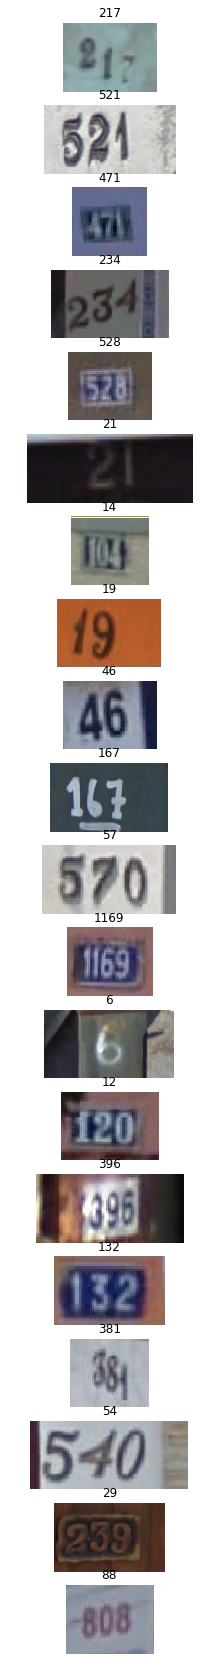

In [220]:
plt.rcParams['figure.figsize'] = (30.0, 30.0)

nImages = 20

f, ax = plt.subplots(nrows=how_many, ncols=1)

imSamples = []
    
for i, j in enumerate(np.sort(np.random.randint(0, imlabels.shape[0], size=nImages))):
    
    filename = str(j + 1) + '.png' #files are offset by 1.
    fullname = os.path.join('extra', filename)
    
    im = Image.open(fullname)
    
    house_num = ''
    digits = imlabels[j][imlabels[j] < 10].astype(int) #10 is blank; no number. 
    for k in digits:
        house_num += str(k)
    
    imSamples.extend([j])
    
    ax[i].axis('off')
    ax[i].set_title(house_num, loc='center')
    ax[i].imshow(im)

In [221]:
model = Model(nImages)

In [222]:
model.predict(imDataset[imSamples])

INFO:tensorflow:Restoring parameters from SVHN_MODEL.ckpt


In [228]:
test_prediction = model.test_prediction

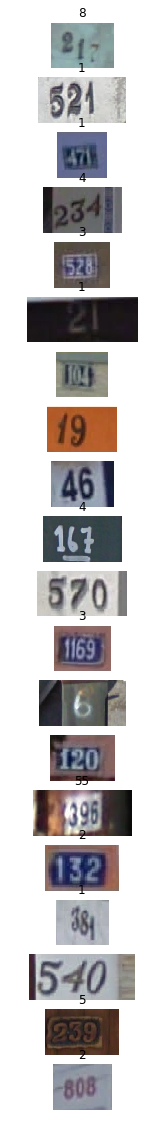

In [230]:
plt.rcParams['figure.figsize'] = (20.0, 20.0)

f, ax = plt.subplots(nrows=nImages, ncols=1)

for i, j in enumerate(imSamples):
    
    filename = str(j+1) + '.png'
    fullname = os.path.join('extra', filename)
    
    im = Image.open(fullname)
    
    house_num = ''
    
    digits = test_prediction[i][test_prediction[i] < 10].astype(int)
    for k in digits:
        house_num += str(k)
        
    ax[i].axis('off')
    ax[i].set_title(house_num, loc='center')
    ax[i].imshow(im)